In [1]:
#Importing Libreries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
#dataset = load_dataset('lukebarousse/data_jobs')
#df = dataset['train'].to_pandas()

# Loading Data from CSV
df = pd.read_csv("F:\ALMACENAMIENTO\DATA ANALITYCS\carpeta_extra\job_postings_flat.csv")

#CLEAN UP
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Naomi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US = df[df['job_country'] == 'United States'].dropna(subset=['salary_year_avg'])

In [3]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Analyst',
 'Senior Data Scientist',
 'Senior Data Engineer']

In [4]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [5]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

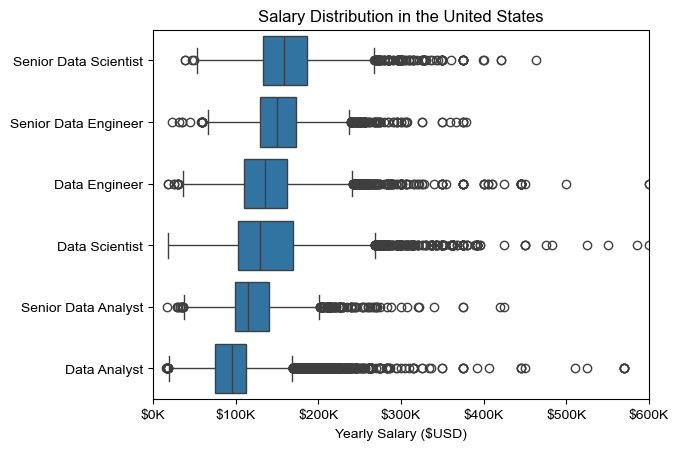

In [6]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order= job_order)
sns.set_theme(style="ticks")

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0,600000)

ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

### Investigate Median Salary Vs Skill for Data Analysts

In [7]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [8]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg', 'job_skills']].head(5)


,salary_year_avg,job_skills
219,55000.0,sql
219,55000.0,python
219,55000.0,numpy
219,55000.0,pandas
219,55000.0,seaborn


In [9]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [10]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,6152,100000.0
oracle,953,100000.0
sql,9360,97500.0
r,3399,97350.0
tableau,5251,95305.0
power bi,4031,95000.0
sas,3118,95000.0
excel,7926,86242.0
powerpoint,1527,85687.5


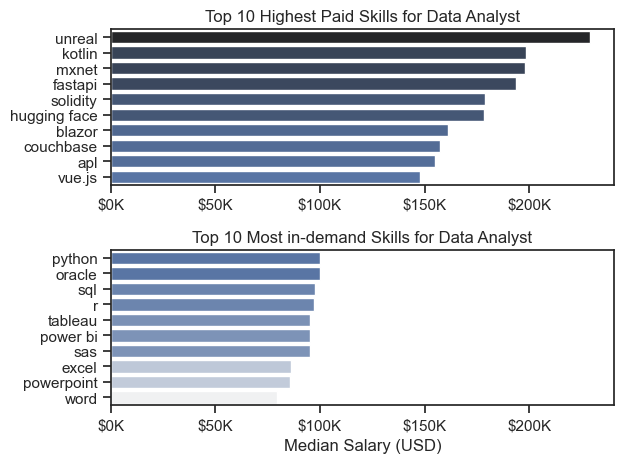

In [11]:
fig, ax = plt.subplots(2,1)

#SEABORN
sns.set_theme(style="ticks")

sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index,ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data= df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median',palette = 'light:b')
ax[1].legend().remove()

ax[1].set_title('Top 10 Most in-demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()